# Checkpoint
Run these cells to restore previous state.

In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
from fastai import *
from fastai.tabular import *

In [14]:
from pathlib import Path

path = Path('~/data_work/wine_review_analysis')

In [15]:
data_path = path/'wine-reviews'

wine_data = pd.read_csv(data_path/'winemag-data-130k-v2.csv')

In [16]:
clean_wine_data = wine_data[wine_data['price'].notna()]

In [17]:
procs = [FillMissing, Categorify, Normalize]

In [18]:
valid_idx = range(len(clean_wine_data)-int(len(clean_wine_data)*.2), len(clean_wine_data))



In [19]:
clean_wine_data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [20]:
test_vars = ['country', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name',
       'variety', 'winery']
model_data = clean_wine_data[test_vars]
model_data.columns

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'taster_name', 'variety', 'winery'],
      dtype='object')

In [21]:
dep_var = 'price'
cat_names = ['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'taster_name', 'winery']



In [35]:
data = TabularDataBunch.from_df(path, model_data, dep_var
                                , valid_idx=valid_idx, procs=procs, cat_names=cat_names
                                , bs = 1000)




In [23]:
from fastai.metrics import mean_squared_error

In [36]:
learn = tabular_learner(data, layers=[200,100], metrics=mean_squared_error)



In [27]:
data.batch_size??

In [32]:
data.train_dl.batch_size

200

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07


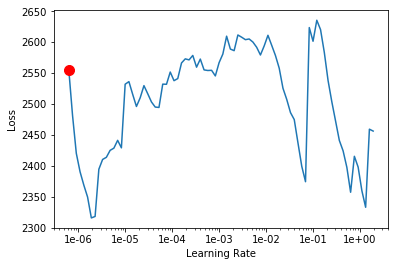

In [38]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(20, 1e-5)

epoch,train_loss,valid_loss,mean_squared_error
1,2846.940186,3064.652100,3064.652100
2,2742.153320,3060.894531,3060.894287
3,2791.140869,3052.318604,3052.318604
4,2850.196777,3040.751953,3040.751465
5,2822.732178,3026.093994,3026.093750
6,2835.636719,3014.980957,3014.981201
7,2919.951904,2999.121094,2999.121094
8,2721.116211,2992.788818,2992.788330
9,2796.652344,2982.403076,2982.403076
10,2740.914307,2971.276123,2971.276123


In [1]:
import fastai

In [2]:
fastai.__version__

'1.0.45'

In [6]:
from fastai import *

In [7]:
dir(fastai)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'version']

In [9]:
fastai.metrics.__all__

['error_rate',
 'accuracy',
 'accuracy_thresh',
 'dice',
 'exp_rmspe',
 'fbeta',
 'FBeta',
 'mse',
 'mean_squared_error',
 'mae',
 'mean_absolute_error',
 'rmse',
 'root_mean_squared_error',
 'msle',
 'mean_squared_logarithmic_error',
 'explained_variance',
 'r2_score',
 'top_k_accuracy',
 'KappaScore',
 'ConfusionMatrix',
 'MatthewsCorreff',
 'Precision',
 'Recall',
 'R2Score',
 'ExplainedVariance',
 'ExpRMSPE',
 'RMSE']

In [43]:
dep_var = 'price'
cat_names = ['country', 'points', 'designation', 'province', 'region_1', 'region_2', 'variety', 'taster_name', 'winery']



data2 = TabularDataBunch.from_df(path, model_data, dep_var
                                , valid_idx=valid_idx, procs=procs, cat_names=cat_names
                                , bs = 1000)

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-02


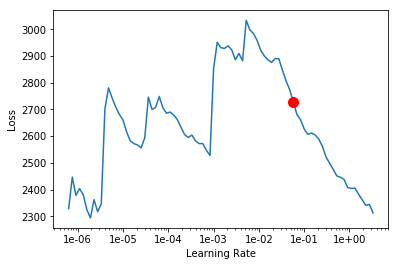

In [45]:
learn.recorder.plot()

In [47]:
learn = tabular_learner(data, layers=[200,100], metrics=mean_squared_error)

In [48]:
learn.fit_one_cycle(9, 5e-2)

epoch,train_loss,valid_loss,mean_squared_error
1,1601.876343,1511.981445,1511.981445
2,905.712219,1101.032959,1101.033203
3,601.195251,909.891541,909.891602
4,700.907288,939.987122,939.987000
5,558.698120,865.369446,865.369385
6,405.082458,885.928162,885.928162
7,437.843475,1031.147217,1031.147217
8,316.205078,1291.309570,1291.309570
9,274.664368,679.600464,679.600464


In [49]:
learn.save('best')

In [50]:
lean_learn = tabular_learner(data, layers=[100,100], metrics=mean_squared_error)

In [51]:
lean_learn.fit_one_cycle(15, 5e-2)

epoch,train_loss,valid_loss,mean_squared_error
1,1952.725342,2624.215576,2624.215820
2,859.386047,884.149841,884.149841
3,701.045471,886.350342,886.350342
4,580.045715,837.950500,837.950378
5,637.529053,820.432251,820.432129
6,579.821960,872.942078,872.942078
7,556.363647,1247.054932,1247.055054
8,579.258301,1039.326904,1039.326904
9,448.702118,831.094299,831.094360
10,319.120697,706.247070,706.247131


In [82]:
model_data.iloc[-300]

country                          US
designation                     NaN
points                           90
price                            24
province                 Washington
region_1       Columbia Valley (WA)
region_2            Columbia Valley
taster_name            Paul Gregutt
variety                  Chardonnay
winery                  Goose Ridge
Name: 129656, dtype: object

In [88]:
i = -2
print(learn.predict(model_data.iloc[i]))
(learn.predict(model_data.iloc[i])[1] - model_data.iloc[i]['price'])**2

(FloatItem [23.280575], tensor([23.2806]), tensor([23.2806]))


tensor([76.0284])

In [70]:
pred1 = learn.predict(model_data.iloc[-1])

In [74]:
pred1[1]+pred1[2]

tensor([66.5595])

In [84]:
import math
math.sqrt(701)

26.476404589747453

In [89]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(42, 13)
    (1): Embedding(31090, 525)
    (2): Embedding(406, 46)
    (3): Embedding(1176, 84)
    (4): Embedding(18, 8)
    (5): Embedding(662, 61)
    (6): Embedding(20, 9)
    (7): Embedding(14913, 348)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=1095, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [92]:
small_data = model_data[model_data['price'] <= 100]
small_valid = range(len(small_data)-int(len(small_data)*.2), len(small_data))

high_price_removed_data = TabularDataBunch.from_df(path, small_data, dep_var
                                , valid_idx=small_valid, procs=procs, cat_names=cat_names
                                , bs = 1000)

In [93]:
small_learner = tabular_learner(high_price_removed_data, layers=[200,100], metrics=mean_squared_error)

In [94]:
small_learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-02


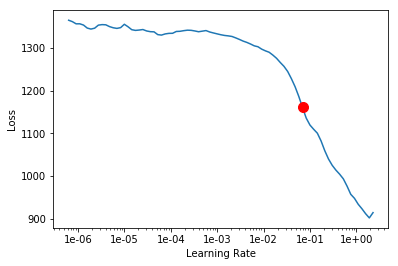

In [95]:
small_learner.recorder.plot()

In [96]:
small_learner.fit_one_cycle(10, 6e-2)

epoch,train_loss,valid_loss,mean_squared_error
1,547.103210,186.350403,186.350403
2,132.524796,112.364922,112.364922
3,62.934795,110.111176,110.111176
4,42.089172,102.490486,102.490486
5,31.096931,101.701469,101.701462
6,25.154987,102.088173,102.088173
7,19.793240,89.861679,89.861679
8,14.819968,90.850403,90.850410
9,11.259111,92.565529,92.565529
10,8.947577,90.772568,90.772568


In [104]:
small_data.iloc[-1]

country                               France
designation    Lieu-dit Harth Cuvée Caroline
points                                    90
price                                     21
province                              Alsace
region_1                              Alsace
region_2                                 NaN
taster_name                       Roger Voss
variety                       Gewürztraminer
winery                      Domaine Schoffit
Name: 129970, dtype: object

In [105]:
small_learner.predict(small_data.iloc[-1])

(FloatItem [23.579622], tensor([23.5796]), tensor([23.5796]))

In [111]:
test = small_data.iloc[-1].copy()

In [115]:
test['points'] = 10

In [117]:
small_learner.predict(test)

(FloatItem [23.653702], tensor([23.6537]), tensor([23.6537]))

In [114]:
test

country                               France
designation    Lieu-dit Harth Cuvée Caroline
points                                    10
price                                     21
province                              Alsace
region_1                              Alsace
region_2                                 NaN
taster_name                       Roger Voss
variety                       Gewürztraminer
winery                      Domaine Schoffit
Name: 129970, dtype: object

In [118]:
cat_names = ['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'taster_name', 'winery']

high_price_removed_data_pts_not_cat = TabularDataBunch.from_df(path, small_data, dep_var
                                , valid_idx=small_valid, procs=procs, cat_names=cat_names
                                , bs = 1000)

In [119]:
small_learner2 = tabular_learner(high_price_removed_data_pts_not_cat, layers=[200,100], metrics=mean_squared_error)

In [120]:
small_learner2.fit_one_cycle(10, 6e-2)

epoch,train_loss,valid_loss,mean_squared_error
1,544.045715,172.214218,172.214203
2,130.734238,118.183350,118.183350
3,62.811916,119.784195,119.784172
4,43.248920,102.914101,102.914101
5,33.515717,91.211113,91.211113
6,26.366064,96.569473,96.569458
7,20.634518,95.242615,95.242622
8,15.454738,89.750595,89.750603
9,11.398589,91.812698,91.812714
10,9.119390,91.614639,91.614632


In [121]:
test = small_data.iloc[-1].copy()

In [122]:
test['points'] = 10

In [123]:
small_learner2.predict(small_data.iloc[-1])

(FloatItem [24.628624], tensor([24.6286]), tensor([24.6286]))

In [124]:
small_data.iloc[-1]

country                               France
designation    Lieu-dit Harth Cuvée Caroline
points                                    90
price                                     21
province                              Alsace
region_1                              Alsace
region_2                                 NaN
taster_name                       Roger Voss
variety                       Gewürztraminer
winery                      Domaine Schoffit
Name: 129970, dtype: object

In [125]:
small_learner2.predict(test)

(FloatItem [-10.118028], tensor([-10.1180]), tensor([-10.1180]))

In [126]:
set(model_data['points'])

{80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100}

In [146]:
prices = []
#for p in set(model_data['points']):
for p in range(50, 101):
    test['points'] = p
    price = small_learner2.predict(test)
    print(f'Score of {p} points leads to prediction of {price}')
    prices.append((p,float(price[1])))

Score of 50 points leads to prediction of (FloatItem [9.267468], tensor([9.2675]), tensor([9.2675]))
Score of 51 points leads to prediction of (FloatItem [9.684968], tensor([9.6850]), tensor([9.6850]))
Score of 52 points leads to prediction of (FloatItem [10.102499], tensor([10.1025]), tensor([10.1025]))
Score of 53 points leads to prediction of (FloatItem [10.520097], tensor([10.5201]), tensor([10.5201]))
Score of 54 points leads to prediction of (FloatItem [10.937696], tensor([10.9377]), tensor([10.9377]))
Score of 55 points leads to prediction of (FloatItem [11.355294], tensor([11.3553]), tensor([11.3553]))
Score of 56 points leads to prediction of (FloatItem [11.76877], tensor([11.7688]), tensor([11.7688]))
Score of 57 points leads to prediction of (FloatItem [12.17068], tensor([12.1707]), tensor([12.1707]))
Score of 58 points leads to prediction of (FloatItem [12.575765], tensor([12.5758]), tensor([12.5758]))
Score of 59 points leads to prediction of (FloatItem [12.980487], tensor

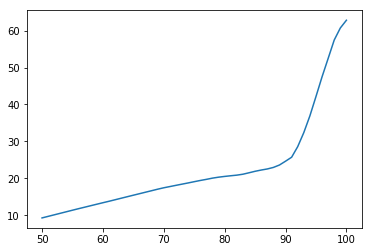

In [147]:
plt.plot(*(zip(*prices)))
plt.show()

Interesting,.  One lesson learned here is that it is important to mconsider whether to make veraibles that could be considered continuous or categorical very carefully.

In [156]:
small_learner2.model.embeds

ModuleList(
  (0): Embedding(42, 13)
  (1): Embedding(30125, 516)
  (2): Embedding(405, 46)
  (3): Embedding(1147, 83)
  (4): Embedding(18, 8)
  (5): Embedding(658, 61)
  (6): Embedding(20, 9)
  (7): Embedding(14767, 346)
)

In [152]:
for c in small_data.columns:
    print(c,len(set(small_data[c])))

country 43
designation 34672
points 21
price 97
province 422
region_1 1177
region_2 18
taster_name 20
variety 693
winery 15706


In [157]:
max_price = max(small_data['price'])


small_learner2_floored = tabular_learner(high_price_removed_data_pts_not_cat, layers=[200,100]
                                         , metrics=mean_squared_error, y_range=[0, max_price*1.5])

In [158]:
small_learner2_floored.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-02


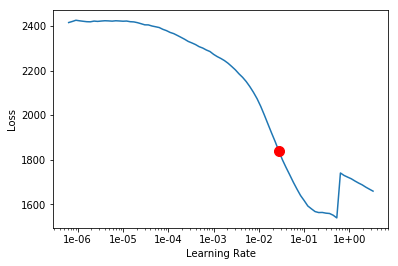

In [159]:
small_learner2_floored.recorder.plot()

In [160]:
small_learner2_floored.fit_one_cycle(10, 2.75e-2)

epoch,train_loss,valid_loss,mean_squared_error
1,446.196350,238.527740,238.527740
2,143.568283,176.266571,176.266586
3,74.294273,126.743294,126.743301
4,47.071224,100.525040,100.525055
5,34.971268,97.946922,97.946938
6,27.729832,93.821838,93.821838
7,21.952883,97.933456,97.933464
8,17.145430,94.597252,94.597267
9,12.936330,91.313011,91.313011
10,10.074520,94.028099,94.028114
